In [1]:
import time
start_time=time.time()

In [2]:
import sys
from pathlib import Path
import json
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


Input path

observations folder location

In [3]:
text_file_0 = open("path-observations.txt", "r")
path_obs = text_file_0.read()

In [4]:
datapath_obs = Path(path_obs).expanduser()

results folder location

In [5]:
text_file_1 = open("path-results.txt", "r")
path_res = text_file_1.read()

In [6]:
datapath_res= Path(path_res).expanduser()

files names

In [7]:
data_file = 'KPech-Orion-O-'

In [8]:
name_export='KPech-Orion-O'

In [9]:
flux_in = data_file + 'sum.fits'
radial_velocity_in = data_file + 'mean.fits'
#sigma_in = data_file + 'sigma.fits'

In [10]:
flux=fits.open(datapath_obs / flux_in)
rad_vel=fits.open(datapath_obs / radial_velocity_in)
#sigma=fits.open(datapath_obs / sigma_in)

Input data of the region

In [11]:
dist = 410 #parsecs
pix = 0.534 #arcsec
seeing = 0.9 #seeing arcsec FWHM

In [12]:
pc = dist*(2*np.pi) / (360 * 60 * 60)
s0 = (seeing*pc)/2.355 #seeing pc RMS
pc,s0

(0.0019877360925490972, 0.0007596443665792729)

In [13]:
flux.info()

Filename: C:\Users\ZAINTEL2\Documents\Aeon\PhD\python\git-hub\astronomical-observations\KPech-Orion-O-sum.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   (356, 514)   float32   


In [14]:
sb = flux[0].data.astype(float)
vv = rad_vel[0].data.astype(float)
#ss = sigma["DATA"].data.astype("float")

In [15]:
## Replace spurious values in the arrays
m = ~np.isfinite(sb*vv) | (sb < 0.0)

sb[m] = 0.0
vv[m] = np.nanmean(vv)
#ss[m] = 0.0
sb /= sb.max()

good = (~m) & (sb > 0.001)

In [16]:
trim = (slice(0, 513), slice(0, 355))

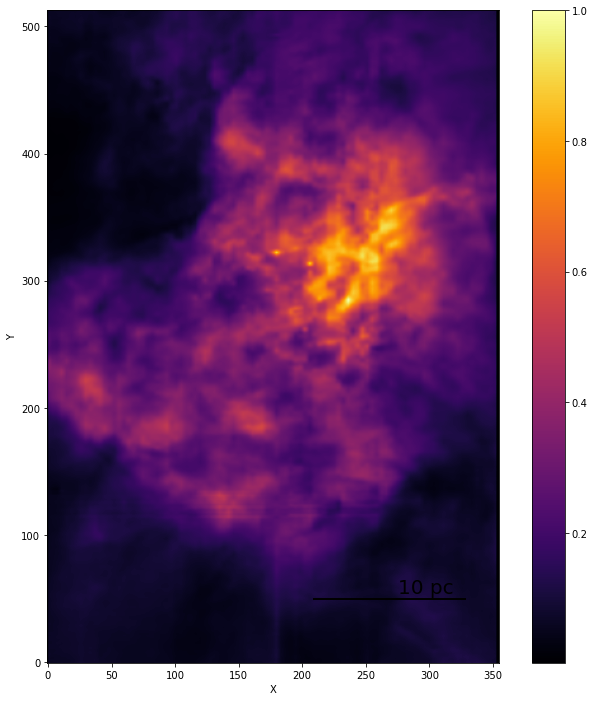

In [17]:
fig, ax = plt.subplots(figsize=(12, 12))


dataI=sb[trim]

plt.figure(1)
plt.imshow(dataI, cmap='inferno')

cbar = plt.colorbar()
plt.clim(0.001,1)
cbar.set_label(' ', rotation=270, labelpad=15)  

ax.set_xlabel('X')
ax.set_ylabel('Y')


ax.text(0.9, 0.1, '10 pc',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=20)
    
plt.axhline(y=50, xmin=0.59, xmax=0.925, linewidth=2, color = 'k')


plt.gca().invert_yaxis()

In [18]:
dffx=pd.DataFrame(sb[trim])

In [19]:
dffx=dffx.stack().reset_index().rename(columns={'level_0':'X', 'level_1':'Y', 0:'I'})

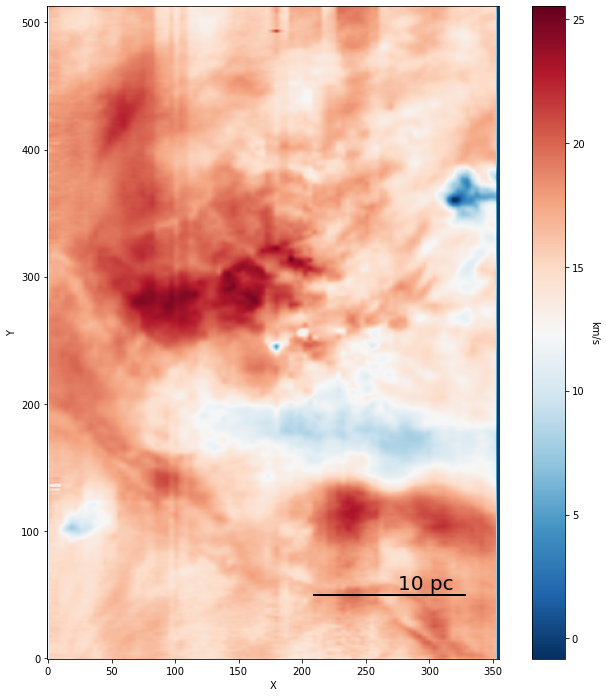

In [20]:
fig, ax = plt.subplots(figsize=(12, 12))


dataRV=vv[trim]

plt.figure(1)
plt.imshow(dataRV, cmap='RdBu_r')

cbar = plt.colorbar()
#plt.clim(225,350)
cbar.set_label('km/s', rotation=270, labelpad=15)  

ax.set_xlabel('X')
ax.set_ylabel('Y')


ax.text(0.9, 0.1, '10 pc',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=20)
    
plt.axhline(y=50, xmin=0.59, xmax=0.925, linewidth=2, color = 'k')


plt.gca().invert_yaxis()

In [21]:
RV=pd.DataFrame(vv[trim])

In [22]:
RV=RV.stack().reset_index().rename(columns={'level_0':'X', 'level_1':'Y', 0:'RV'})

fig, ax = plt.subplots(figsize=(12, 12))


dataS=ss[trim]

plt.figure(1)
plt.imshow(dataS, cmap='magma')

cbar = plt.colorbar()
#plt.clim(225,350)
cbar.set_label(' ', rotation=270, labelpad=15)  

ax.set_xlabel('X')
ax.set_ylabel('Y')


ax.text(0.9, 0.1, '10 pc',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=20)
    
plt.axhline(y=50, xmin=0.59, xmax=0.925, linewidth=2, color = 'k')


plt.gca().invert_yaxis()

dsig=pd.DataFrame(ss[trim])

dsig=dsig.stack().reset_index().rename(columns={'level_0':'X', 'level_1':'Y', 0:'Sig'})

In [23]:
data=RV
data['I']=dffx.I
#data['Sig']=dsig.Sig
data.describe()

,X,Y,RV,I
count,182115.000000,182115.000000,182115.000000,182115.000000
mean,256.000000,177.000000,16.107990,0.214629
std,148.090469,102.479548,3.175508,0.158220
min,0.000000,0.000000,-0.819397,0.000000
25%,128.000000,88.000000,14.615685,0.083233
50%,256.000000,177.000000,16.101160,0.182539
75%,384.000000,266.000000,18.018742,0.299547
max,512.000000,354.000000,25.508438,1.000000


In [24]:
mI=data.I>0.001

In [25]:
data[mI].describe()

,X,Y,RV,I
count,180576.000000,180576.000000,180576.000000,180576.000000
mean,256.000000,176.500000,16.245274,0.216458
std,148.090473,101.613519,2.817724,0.157642
min,0.000000,1.000000,-0.819397,0.010242
25%,128.000000,88.750000,14.662721,0.084661
50%,256.000000,176.500000,16.124955,0.184372
75%,384.000000,264.250000,18.037173,0.300698
max,512.000000,352.000000,25.508438,1.000000


Text(0.5, 6.79999999999999, 'Radial velocity [km/s]')

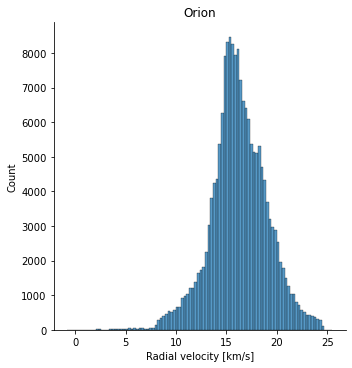

In [26]:
#sns.displot(RV[0]-RV[0].mean(),bins=100)
sns.displot(data[mI].RV,bins=100)

#plt.xlim(200,350)

#plt.text(0.75, 1.15,'n ='+str(RV[0].count()), ha='center', va='center', transform=ax.transAxes, color='k')
#plt.text(0.80, 0.82,'$μ$ ='+str(np.round(RV[0].mean(),2))+' km/s', ha='center', va='center', transform=ax.transAxes, color='k')
#plt.text(0.85, 1.25,'$σ^{2}$ ='+str(np.round(RV[0].var(),2))+' km$^{2}$/s$^{2}$', ha='center', va='center', transform=ax.transAxes, color='k')

plt.title('Orion')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"
plt.xlabel('Radial velocity [km/s]')

In [27]:
data_export_list = {
        'name': name_export, 
        'pc' : pc,
        's0' : s0,
        'pix' : pix,
         name_export : np.array(data[mI]),
      }
data_export_list

{'name': 'KPech-Orion-O',
 'pc': 0.0019877360925490972,
 's0': 0.0007596443665792729,
 'pix': 0.534,
 'KPech-Orion-O': array([[0.00000000e+00, 1.00000000e+00, 1.57526999e+01, 5.71732335e-02],
        [0.00000000e+00, 2.00000000e+00, 1.56281719e+01, 5.81438517e-02],
        [0.00000000e+00, 3.00000000e+00, 1.55036430e+01, 5.91144889e-02],
        ...,
        [5.12000000e+02, 3.50000000e+02, 1.42851124e+01, 1.16082125e-01],
        [5.12000000e+02, 3.51000000e+02, 1.42602015e+01, 1.14906324e-01],
        [5.12000000e+02, 3.52000000e+02, 1.42352896e+01, 1.13730532e-01]])}

In [28]:

data_export_matrix = {
       'name': name_export, 
       'pc' : pc,
       's0' : s0,
       'pix' : pix,
       'sb' : flux[0].data.astype(float),
       'vv' : rad_vel[0].data.astype(float),
#       'ss' : sigma["DATA"].data.astype("float")

      }

data_export_matrix

{'name': 'KPech-Orion-O',
 'pc': 0.0019877360925490972,
 's0': 0.0007596443665792729,
 'pix': 0.534,
 'sb': array([[   0.        , 5873.16552734, 5972.87304688, ...,    0.        ,
            0.        ,    0.        ],
        [   0.        , 6633.90722656, 6603.43408203, ...,    0.        ,
            0.        ,    0.        ],
        [   0.        , 6675.9765625 , 6624.10693359, ...,    0.        ,
            0.        ,    0.        ],
        ...,
        [   0.        , 6419.34814453, 6405.36230469, ...,    0.        ,
            0.        ,    0.        ],
        [   0.        , 6410.38769531, 6424.95019531, ...,    0.        ,
            0.        ,    0.        ],
        [   0.        , 6491.86376953, 6488.77832031, ...,    0.        ,
            0.        ,    0.        ]]),
 'vv': array([[ 0.        , 15.75269985, 15.62817192, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        , 15.39238071, 15.33488464, ...,  0.        ,
          0.        

In [29]:
class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)

In [30]:
jsonfilename =name_export +"-m.json"
with open(datapath_res/jsonfilename, "w") as f:
    json.dump(data_export_matrix, fp=f, indent=3, cls=MyEncoder)

In [31]:
jsonfilename =name_export +"-l.json"
with open(datapath_res/jsonfilename, "w") as f:
    json.dump(data_export_list, fp=f, indent=3, cls=MyEncoder)

In [32]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 9.819163084030151 seconds ---


In [33]:
!jupyter nbconvert --to script --no-prompt otv-KPech-Orion-O.ipynb

[NbConvertApp] Converting notebook otv-KPech-Orion-O.ipynb to script
[NbConvertApp] Writing 5303 bytes to otv-KPech-Orion-O.py
